In [2]:
import torch
from torch.utils.data import IterableDataset, DataLoader, Subset
from datetime import datetime as dt, timedelta
import pandas as pd
import os
import random
import numpy as np
import torch.nn as nn
from pandas import DataFrame as df
import mplfinance as mpf

# check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

seed = 42  # choose any seed you prefer
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

class PriceDataset(torch.utils.data.Dataset):
    def __init__(self, item, timespan, start_date_str, end_date_str):
        self.directory = f'csvfiles/{item}'
        self.item = item
        self.timespan = timespan
        start_date = dt.strptime(start_date_str, '%Y-%m-%d').date()
        end_date = dt.strptime(end_date_str, '%Y-%m-%d').date()
        self.dates = [single_date.strftime("%Y-%m-%d") for single_date in self.daterange(start_date, end_date)]
        self.columns = [1, 4]  # Selecting open and close prices
        self.filenames = self.get_filenames()

    def daterange(self, start_date, end_date):
        for n in range(int((end_date - start_date).days) + 1):
            yield start_date + timedelta(n)

    def get_filenames(self):
        filenames = []
        for date in self.dates:
            filename = f"{self.directory}/{self.item}-{self.timespan}-{date}.csv"
            if os.path.exists(filename):
                filenames.append(filename)
        return filenames

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        filename = self.filenames[idx]
        df = pd.read_csv(filename, usecols=self.columns, header=None)
        df = df[df.columns[::-1]]  # Swap the columns
        df = df.diff(axis=1)[1]  # Compute difference between close and open price for each row
        return torch.tensor(df.values, dtype=torch.float32)  # Convert to tensor


def sliding_window_fn(batch):
    windows = []
    for tensor in batch:
        for i in range(tensor.shape[0] - 100 + 1):  # Create windows of 100 rows each
            windows.append(tensor[i:i+100])
    return torch.stack(windows)


# Create the dataset
dataset = PriceDataset('BTCUSDT', '1m', '2021-03-01', '2023-04-30')

# Shuffle the dataset indices
indices = list(range(len(dataset)))
random.shuffle(indices)

# Split the indices into training and test sets
split_idx = int(0.8 * len(indices))
train_indices, test_indices = indices[:split_idx], indices[split_idx:]

# Create data subsets using the indices
train_data = Subset(dataset, train_indices)
test_data = Subset(dataset, test_indices)

# Create the data loaders
train_loader = DataLoader(train_data, batch_size=1, collate_fn=sliding_window_fn, shuffle=False, drop_last=True)
test_loader = DataLoader(test_data, batch_size=1, collate_fn=sliding_window_fn, shuffle=False, drop_last=True)

cpu


In [3]:
class LSTM1(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=50, output_dim=10, num_layers=2):
        super(LSTM1, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Define the output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Reshape the input tensor to [batch_size, sequence_length, number_of_features]
        x = x.view(x.size(0), -1, 1)

        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Index hidden state of last time step
        out = out[:, -1, :]
        out = self.fc(out)
        return out


In [4]:
class LSTM2(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=50, output_dim=10, num_layers=3):
        super(LSTM2, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Define the output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Reshape the input tensor to [batch_size, sequence_length, number_of_features]
        x = x.view(x.size(0), -1, 1)

        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Index hidden state of last time step
        out = out[:, -1, :]
        out = self.fc(out)
        return out


In [5]:
class LSTM3(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=50, output_dim=10, num_layers=4):
        super(LSTM3, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Define the output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Reshape the input tensor to [batch_size, sequence_length, number_of_features]
        x = x.view(x.size(0), -1, 1)

        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Index hidden state of last time step
        out = out[:, -1, :]
        out = self.fc(out)
        return out


In [6]:
class LSTM4(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=50, output_dim=10, num_layers=2, dropout_prob=0.05):
        super(LSTM4, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob if num_layers > 1 else 0)

        # Define dropout layer
        self.dropout = nn.Dropout(dropout_prob)

        # Define the output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Reshape the input tensor to [batch_size, sequence_length, number_of_features]
        x = x.view(x.size(0), -1, 1)

        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Dropout
        out = self.dropout(out)

        # Index hidden state of last time step
        out = out[:, -1, :]
        out = self.fc(out)
        return out


In [7]:
class LSTM5(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=50, output_dim=10, num_layers=3, dropout_prob=0.05):
        super(LSTM5, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob if num_layers > 1 else 0)

        # Define dropout layer
        self.dropout = nn.Dropout(dropout_prob)

        # Define the output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Reshape the input tensor to [batch_size, sequence_length, number_of_features]
        x = x.view(x.size(0), -1, 1)

        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Dropout
        out = self.dropout(out)

        # Index hidden state of last time step
        out = out[:, -1, :]
        out = self.fc(out)
        return out


In [8]:
class LSTM6(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=50, output_dim=10, num_layers=4, dropout_prob=0.05):
        super(LSTM6, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob if num_layers > 1 else 0)

        # Define dropout layer
        self.dropout = nn.Dropout(dropout_prob)

        # Define the output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Reshape the input tensor to [batch_size, sequence_length, number_of_features]
        x = x.view(x.size(0), -1, 1)

        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Dropout
        out = self.dropout(out)

        # Index hidden state of last time step
        out = out[:, -1, :]
        out = self.fc(out)
        return out


In [9]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)  # Move the data to the device (CPU or GPU)
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(data)  # Forward pass
        loss = criterion(outputs, data[:, -10:])  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the weights

def evaluate(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data in test_loader:
            data = data.to(device)  # Move the data to the device
            outputs = model(data)  # Forward pass
            loss = criterion(outputs, data[:, -10:])  # Compute the loss
            test_loss += loss.item() * data.size(0)  # Accumulate the loss
    return test_loss / len(test_loader.dataset)  # Return the average loss


In [32]:
# Create the model, criterion, and optimizer
best_val_loss = float('inf')
model1 = LSTM1().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)
epochs = 30

# Train and evaluate the model
for epoch in range(epochs):  # Adjust the number of epochs as needed
    train(model1, train_loader, criterion, optimizer, device)
    val_loss = evaluate(model1, test_loader, criterion, device)
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}")
    
    # Save the model if the validation loss is the best we've seen so far.
    if val_loss < best_val_loss:
        torch.save({
            'model1_state_dict': model1.state_dict(),
            'optimizer1_state_dict': optimizer.state_dict(),
        }, 'models for report/model1.pth')
        best_val_loss = val_loss

Epoch 1, Validation Loss: 1112101.0842317282
Epoch 2, Validation Loss: 719459.4456721559
Epoch 3, Validation Loss: 538648.3276170747
Epoch 4, Validation Loss: 506825.25704077206
Epoch 5, Validation Loss: 394801.9010578574
Epoch 6, Validation Loss: 353163.5705616834
Epoch 7, Validation Loss: 346141.84983545745
Epoch 8, Validation Loss: 302189.71886329434
Epoch 9, Validation Loss: 324146.00469935016
Epoch 10, Validation Loss: 328851.2783269472
Epoch 11, Validation Loss: 322268.86401912704
Epoch 12, Validation Loss: 264814.7880968605
Epoch 13, Validation Loss: 323717.6403576773
Epoch 14, Validation Loss: 396496.7335491038
Epoch 15, Validation Loss: 273452.96557028225
Epoch 16, Validation Loss: 330579.3209189619
Epoch 17, Validation Loss: 501321.24927362666
Epoch 18, Validation Loss: 550645.8989096085
Epoch 19, Validation Loss: 356358.3583924572
Epoch 20, Validation Loss: 303201.80416226876
Epoch 21, Validation Loss: 295392.65266450436
Epoch 22, Validation Loss: 276591.03075267834
Epoch 23

In [33]:
# Create the model, criterion, and optimizer
best_val_loss = float('inf')
model2 = LSTM2().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)
epochs = 30

# Train and evaluate the model
for epoch in range(epochs):  # Adjust the number of epochs as needed
    train(model2, train_loader, criterion, optimizer, device)
    val_loss = evaluate(model2, test_loader, criterion, device)
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}")

    # Save the model if the validation loss is the best we've seen so far.
    if val_loss < best_val_loss:
        torch.save({
            'model2_state_dict': model2.state_dict(),
            'optimizer2_state_dict': optimizer.state_dict(),
        }, 'models for report/model2.pth')
        best_val_loss = val_loss

Epoch 1, Validation Loss: 1068614.7496229103
Epoch 2, Validation Loss: 630526.017917182
Epoch 3, Validation Loss: 471318.5069773023
Epoch 4, Validation Loss: 386285.42429359304
Epoch 5, Validation Loss: 342438.95227487874
Epoch 6, Validation Loss: 307649.77981084905
Epoch 7, Validation Loss: 279437.3632256429
Epoch 8, Validation Loss: 262020.06927101934
Epoch 9, Validation Loss: 230864.25246383052
Epoch 10, Validation Loss: 212732.95617764496
Epoch 11, Validation Loss: 272415.0592748785
Epoch 12, Validation Loss: 209424.47819671044
Epoch 13, Validation Loss: 198904.31725547693
Epoch 14, Validation Loss: 238949.11748093105
Epoch 15, Validation Loss: 181628.49279202343
Epoch 16, Validation Loss: 190122.5059371525
Epoch 17, Validation Loss: 178670.6603817624
Epoch 18, Validation Loss: 155444.79288817875
Epoch 19, Validation Loss: 250591.8812130847
Epoch 20, Validation Loss: 187356.46489960985
Epoch 21, Validation Loss: 184704.89086306095
Epoch 22, Validation Loss: 198908.87932050604
Epoch

In [34]:
# Create the model, criterion, and optimizer
best_val_loss = float('inf')
model3 = LSTM3().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.01)
epochs = 30

# Train and evaluate the model
for epoch in range(epochs):  # Adjust the number of epochs as needed
    train(model3, train_loader, criterion, optimizer, device)
    val_loss = evaluate(model3, test_loader, criterion, device)
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}")

    # Save the model if the validation loss is the best we've seen so far.
    if val_loss < best_val_loss:
        torch.save({
            'model3_state_dict': model3.state_dict(),
            'optimizer3_state_dict': optimizer.state_dict(),
        }, 'models for report/model3.pth')
        best_val_loss = val_loss

Epoch 1, Validation Loss: 1154072.2291340968
Epoch 2, Validation Loss: 691684.178246335
Epoch 3, Validation Loss: 475879.87758454983
Epoch 4, Validation Loss: 396345.53189665556
Epoch 5, Validation Loss: 322840.48409273743
Epoch 6, Validation Loss: 293984.614943542
Epoch 7, Validation Loss: 258572.74423542302
Epoch 8, Validation Loss: 251690.59911739826
Epoch 9, Validation Loss: 224378.5199593798
Epoch 10, Validation Loss: 213667.5119355469
Epoch 11, Validation Loss: 215117.71072323938
Epoch 12, Validation Loss: 188463.20162284368
Epoch 13, Validation Loss: 181611.8358650676
Epoch 14, Validation Loss: 168888.77335172
Epoch 15, Validation Loss: 168055.87457948693
Epoch 16, Validation Loss: 187669.06634128993
Epoch 17, Validation Loss: 172789.44401696642
Epoch 18, Validation Loss: 180516.92892599257
Epoch 19, Validation Loss: 148604.8519039979
Epoch 20, Validation Loss: 150653.9408209041
Epoch 21, Validation Loss: 131378.06736827496
Epoch 22, Validation Loss: 136909.75076852055
Epoch 23,

In [47]:
# Create the model, criterion, and optimizer
best_val_loss = float('inf')
model4 = LSTM4().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=0.01)
epochs = 40

# Train and evaluate the model
for epoch in range(epochs):  # Adjust the number of epochs as needed
    train(model4, train_loader, criterion, optimizer, device)
    val_loss = evaluate(model4, test_loader, criterion, device)
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}")

    # Save the model if the validation loss is the best we've seen so far.
    if val_loss < best_val_loss:
        torch.save({
            'model4_state_dict': model4.state_dict(),
            'optimizer4_state_dict': optimizer.state_dict(),
        }, 'models for report/model4.pth')
        best_val_loss = val_loss

Epoch 1, Validation Loss: 1101863.1034877584
Epoch 2, Validation Loss: 712693.7484476453
Epoch 3, Validation Loss: 543179.7868751318
Epoch 4, Validation Loss: 464433.1982310347
Epoch 5, Validation Loss: 399435.876382851
Epoch 6, Validation Loss: 365741.14755962125
Epoch 7, Validation Loss: 334788.3300091223
Epoch 8, Validation Loss: 315646.42653347
Epoch 9, Validation Loss: 288764.9326135782
Epoch 10, Validation Loss: 296399.6616173645
Epoch 11, Validation Loss: 266274.96979788376
Epoch 12, Validation Loss: 287832.1242105421
Epoch 13, Validation Loss: 243455.32231170352
Epoch 14, Validation Loss: 257248.04324930906
Epoch 15, Validation Loss: 258442.86567449945
Epoch 16, Validation Loss: 246875.86850911024
Epoch 17, Validation Loss: 241208.49869868628
Epoch 18, Validation Loss: 242634.9527867785
Epoch 19, Validation Loss: 243849.4240000589
Epoch 20, Validation Loss: 215716.64719060945
Epoch 21, Validation Loss: 221713.9525509979
Epoch 22, Validation Loss: 221838.91679974398
Epoch 23, Va

In [48]:
# Create the model, criterion, and optimizer
best_val_loss = float('inf')
model5 = LSTM5().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model5.parameters(), lr=0.01)
epochs = 40

# Train and evaluate the model
for epoch in range(epochs):  # Adjust the number of epochs as needed
    train(model5, train_loader, criterion, optimizer, device)
    val_loss = evaluate(model5, test_loader, criterion, device)
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}")

    # Save the model if the validation loss is the best we've seen so far.
    if val_loss < best_val_loss:
        torch.save({
            'model5_state_dict': model5.state_dict(),
            'optimizer5_state_dict': optimizer.state_dict(),
        }, 'models for report/model5.pth')
        best_val_loss = val_loss

Epoch 1, Validation Loss: 1074024.910062742
Epoch 2, Validation Loss: 647403.5829355681
Epoch 3, Validation Loss: 488727.46757832414
Epoch 4, Validation Loss: 407384.21034571924
Epoch 5, Validation Loss: 348860.911646633
Epoch 6, Validation Loss: 310073.0863467725
Epoch 7, Validation Loss: 289566.5205223124
Epoch 8, Validation Loss: 273472.6567806718
Epoch 9, Validation Loss: 256692.97251467567
Epoch 10, Validation Loss: 226570.66618887967
Epoch 11, Validation Loss: 211734.2238545845
Epoch 12, Validation Loss: 205669.66540298532
Epoch 13, Validation Loss: 214958.79239944843
Epoch 14, Validation Loss: 223333.57828924022
Epoch 15, Validation Loss: 190789.84266543612
Epoch 16, Validation Loss: 207241.88694232103
Epoch 17, Validation Loss: 203183.05157810636
Epoch 18, Validation Loss: 188474.7649591254
Epoch 19, Validation Loss: 179619.3111251559
Epoch 20, Validation Loss: 178687.05000429333
Epoch 21, Validation Loss: 184831.1841580043
Epoch 22, Validation Loss: 170281.21296648314
Epoch 23

In [49]:
# Create the model, criterion, and optimizer
best_val_loss = float('inf')
model6 = LSTM6().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model6.parameters(), lr=0.01)
epochs = 40

# Train and evaluate the model
for epoch in range(epochs):  # Adjust the number of epochs as needed
    train(model6, train_loader, criterion, optimizer, device)
    val_loss = evaluate(model6, test_loader, criterion, device)
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}")

    # Save the model if the validation loss is the best we've seen so far.
    if val_loss < best_val_loss:
        torch.save({
            'model6_state_dict': model6.state_dict(),
            'optimizer6_state_dict': optimizer.state_dict(),
        }, 'models for report/model6.pth')
        best_val_loss = val_loss

Epoch 1, Validation Loss: 1159557.2247891747
Epoch 2, Validation Loss: 655307.8731871947
Epoch 3, Validation Loss: 476162.1703109415
Epoch 4, Validation Loss: 394740.8585001562
Epoch 5, Validation Loss: 334483.2309794739
Epoch 6, Validation Loss: 301044.08134956384
Epoch 7, Validation Loss: 266651.2639557961
Epoch 8, Validation Loss: 257547.20915961865
Epoch 9, Validation Loss: 243835.77208197117
Epoch 10, Validation Loss: 249558.6638125779
Epoch 11, Validation Loss: 209833.65018178232
Epoch 12, Validation Loss: 196303.51771599392
Epoch 13, Validation Loss: 183482.1958622895
Epoch 14, Validation Loss: 171815.7128740403
Epoch 15, Validation Loss: 177703.8200525885
Epoch 16, Validation Loss: 172615.79236469217
Epoch 17, Validation Loss: 160447.503295714
Epoch 18, Validation Loss: 159414.22163029885
Epoch 19, Validation Loss: 163243.117377842
Epoch 20, Validation Loss: 149584.90758724182
Epoch 21, Validation Loss: 150360.79658584774
Epoch 22, Validation Loss: 138085.86878239358
Epoch 23, 

In [63]:
test_dataset = PriceDataset('ETHUSDT', '1m', '2021-03-01', '2023-04-30')
test_loader = DataLoader(test_dataset, batch_size=1, collate_fn=sliding_window_fn, shuffle=False, drop_last=True)

In [65]:
model_list = [LSTM1(), LSTM2(), LSTM3(), LSTM4(), LSTM5(), LSTM6()]

class MAPELoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, output, target):
        return torch.mean(torch.abs((target - output) * 100 / (target + 1e-10)))


for i in range(6):
    # Move model to device
    model = model_list[i].to(device)

    # Initialize the criterion
    criterion = MAPELoss()  # Using MAPELoss

    load_path = 'models for report/'
    model_filename = f'model{i+1}.pth'  # Specify the model filename
    model_path = os.path.join(load_path, model_filename)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint[f'model{i+1}_state_dict'])
    optimizer.load_state_dict(checkpoint[f'optimizer{i+1}_state_dict'])

    # Evaluate the model
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data in test_loader:
            data = data.to(device)
            outputs = model(data[:, :-10])  # Pass the first 90 data points through the model
            loss = criterion(outputs, data[:, -10:])  # Compare the output with the actual last 10 data points
            test_loss += loss.item() * data.size(0)

    test_loss /= len(test_loader.dataset)
    print(f'Model: {model.__class__.__name__} | Test Loss (MAPE): {test_loss}%')

Model: LSTM1 | Test Loss (MAPE): 26369654788897.895%
Model: LSTM2 | Test Loss (MAPE): 13145809353347.15%
Model: LSTM3 | Test Loss (MAPE): 24179470398066.8%
Model: LSTM4 | Test Loss (MAPE): 11057046564136.371%
Model: LSTM5 | Test Loss (MAPE): 13964177210777.076%
Model: LSTM6 | Test Loss (MAPE): 14331585280605.791%


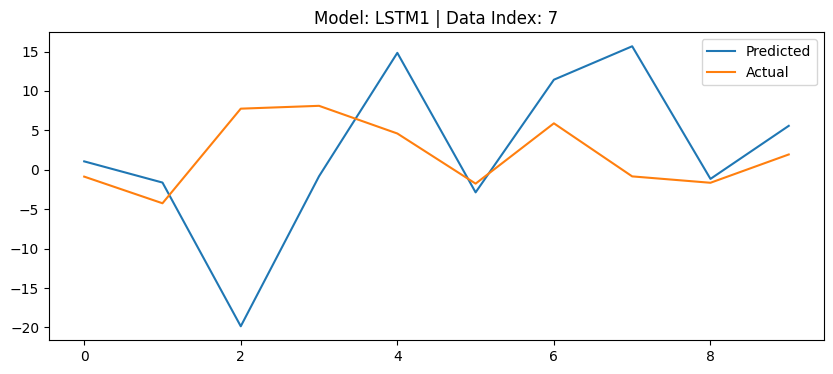

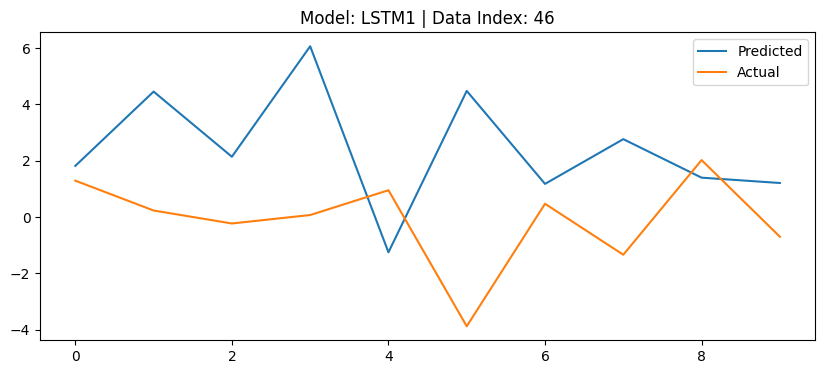

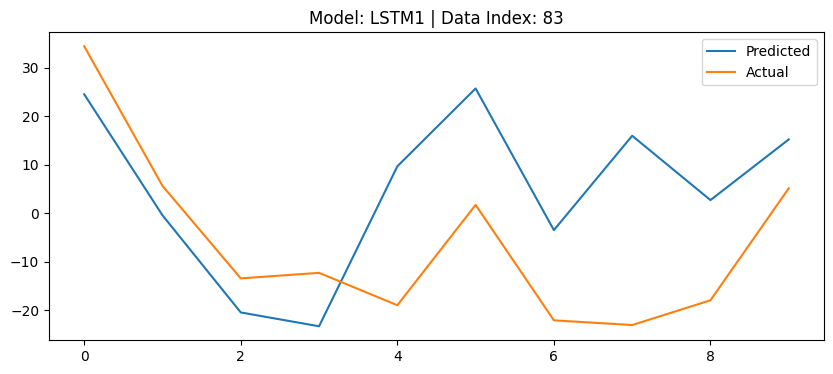

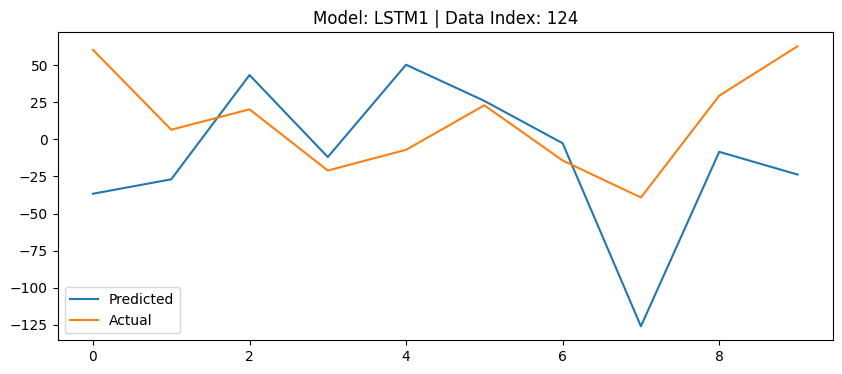

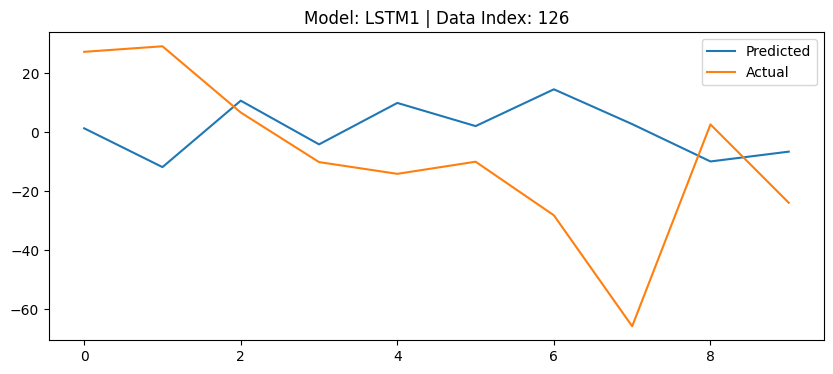

Model: LSTM1 | Test Loss (MSE): 3883358.8067575432


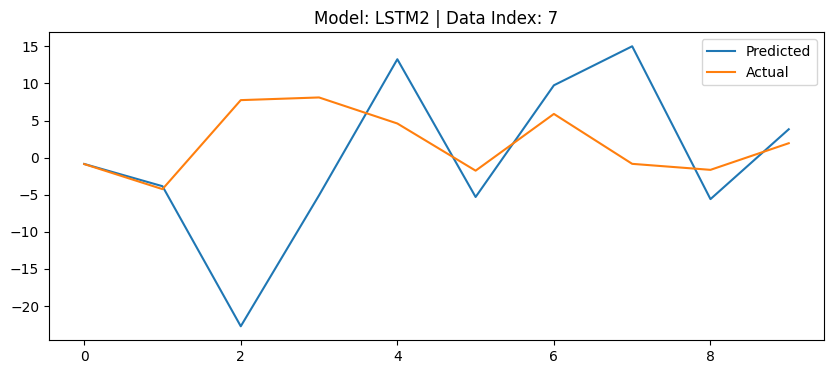

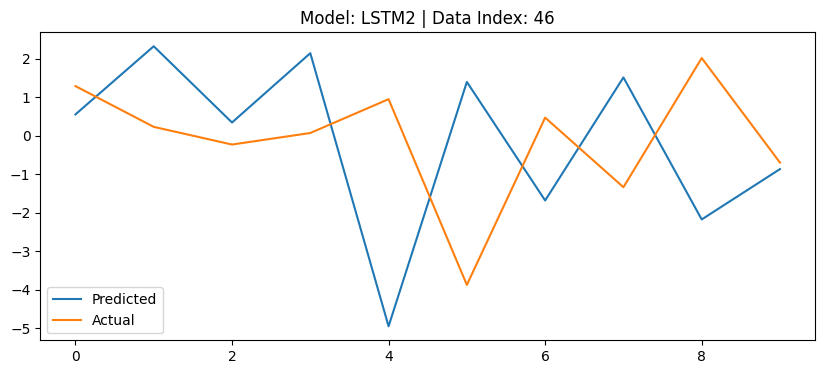

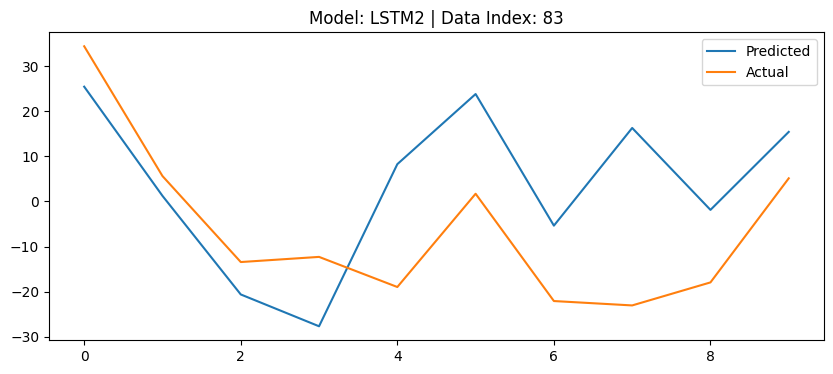

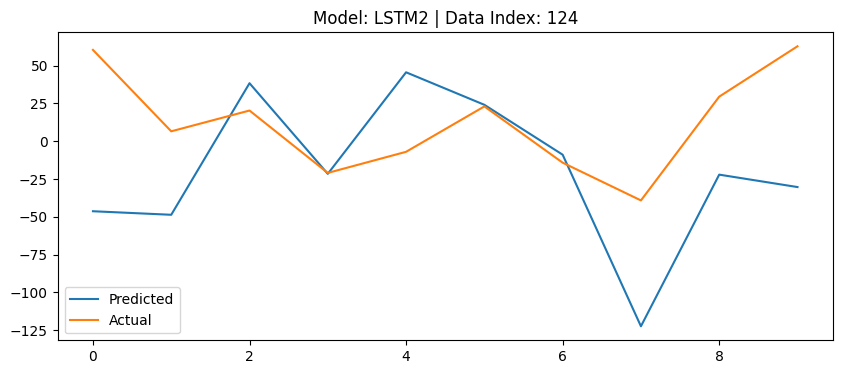

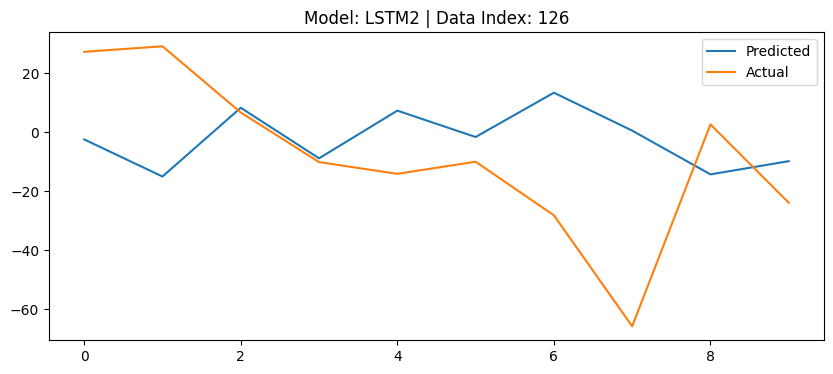

Model: LSTM2 | Test Loss (MSE): 4060873.819767862


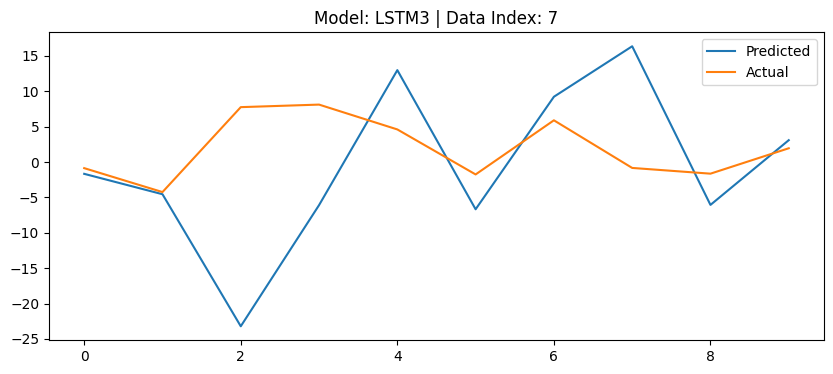

KeyboardInterrupt: 

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Use Mean Squared Error Loss
criterion = nn.MSELoss()

# Random indices for the evaluation
random_indices = random.sample(range(len(test_loader.dataset)), 5)

for i in range(6):
    # Move model to device
    model = model_list[i].to(device)

    load_path = 'models for report/'
    model_filename = f'model{i+1}.pth'  # Specify the model filename
    model_path = os.path.join(load_path, model_filename)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    checkpoint = torch.load(model_path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint[f'model{i+1}_state_dict'])
    optimizer.load_state_dict(checkpoint[f'optimizer{i+1}_state_dict'])

    # Evaluate the model
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for j, data in enumerate(test_loader):
            data = data.to(device)
            outputs = model(data[:, :-10])  # Pass the first 90 data points through the model
            loss = criterion(outputs, data[:, -10:])  # Compare the output with the actual last 10 data points
            test_loss += loss.item() * data.size(0)

            # Check if the current index is in the randomly selected indices
            if j in random_indices:
                # Plot actual and predicted prices
                plt.figure(figsize=(10, 4))
                plt.plot(np.arange(10), outputs.cpu().numpy()[0], label='Predicted')
                plt.plot(np.arange(10), data[:, -10:].cpu().numpy()[0], label='Actual')
                plt.title(f'Model: {model.__class__.__name__} | Data Index: {j}')
                plt.legend()
                plt.show()

    test_loss /= len(test_loader.dataset)
    print(f'Model: {model.__class__.__name__} | Test Loss (MSE): {test_loss}')


Model: LSTM1 | Test Loss (MSE): 3883358.8067575432
Model: LSTM2 | Test Loss (MSE): 4060873.819767862
Model: LSTM3 | Test Loss (MSE): 4166818.7299175444
Model: LSTM4 | Test Loss (MSE): 3844619.7296163063
Model: LSTM5 | Test Loss (MSE): 3904530.274184491
Model: LSTM6 | Test Loss (MSE): 4034545.799360251


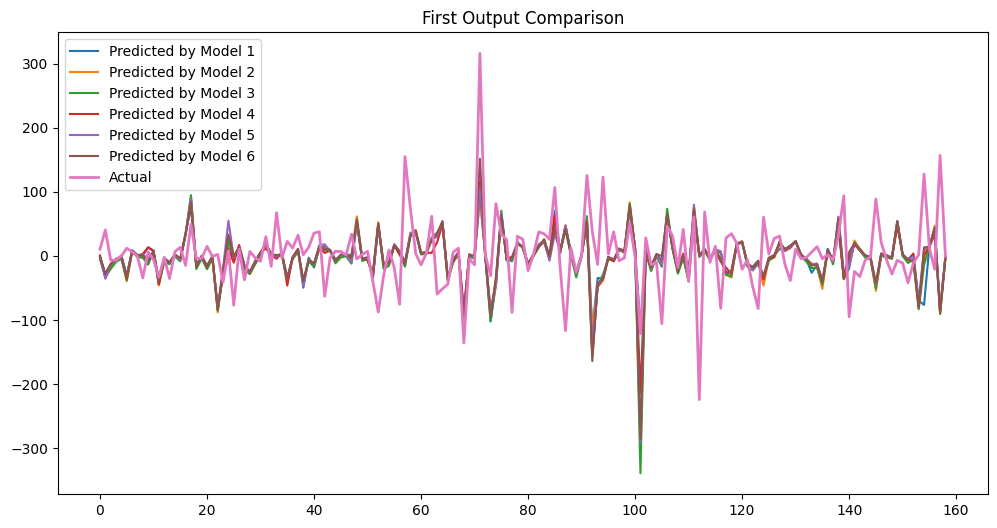

In [11]:
import matplotlib.pyplot as plt
import numpy as np

model_list = [LSTM1(), LSTM2(), LSTM3(), LSTM4(), LSTM5(), LSTM6()]

# Use Mean Squared Error Loss
criterion = nn.MSELoss()

predicted_first_outputs = [[] for _ in range(6)]
actual_first_outputs = []

for i in range(6):
    # Move model to device
    model = model_list[i].to(device)

    load_path = 'models for report/'
    model_filename = f'model{i+1}.pth'  # Specify the model filename
    model_path = os.path.join(load_path, model_filename)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    checkpoint = torch.load(model_path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint[f'model{i+1}_state_dict'])
    optimizer.load_state_dict(checkpoint[f'optimizer{i+1}_state_dict'])

    # Evaluate the model
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for j, data in enumerate(test_loader):
            data = data.to(device)
            outputs = model(data[:, :-10])  # Pass the first 90 data points through the model
            loss = criterion(outputs, data[:, -10:])  # Compare the output with the actual last 10 data points
            test_loss += loss.item() * data.size(0)

            # Store the first output from the prediction and the actual value
            predicted_first_outputs[i].append(outputs.cpu().numpy()[0][0])
            if i == 0:  # Only store actual outputs once
                actual_first_outputs.append(data[:, -10:].cpu().numpy()[0][0])

    test_loss /= len(test_loader.dataset)
    print(f'Model: {model.__class__.__name__} | Test Loss (MSE): {test_loss}')

# Plot all first outputs
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.plot(predicted_first_outputs[i], label=f'Predicted by Model {i+1}')
plt.plot(actual_first_outputs, label='Actual', linewidth=2)
plt.title('First Output Comparison')
plt.legend()
plt.show()


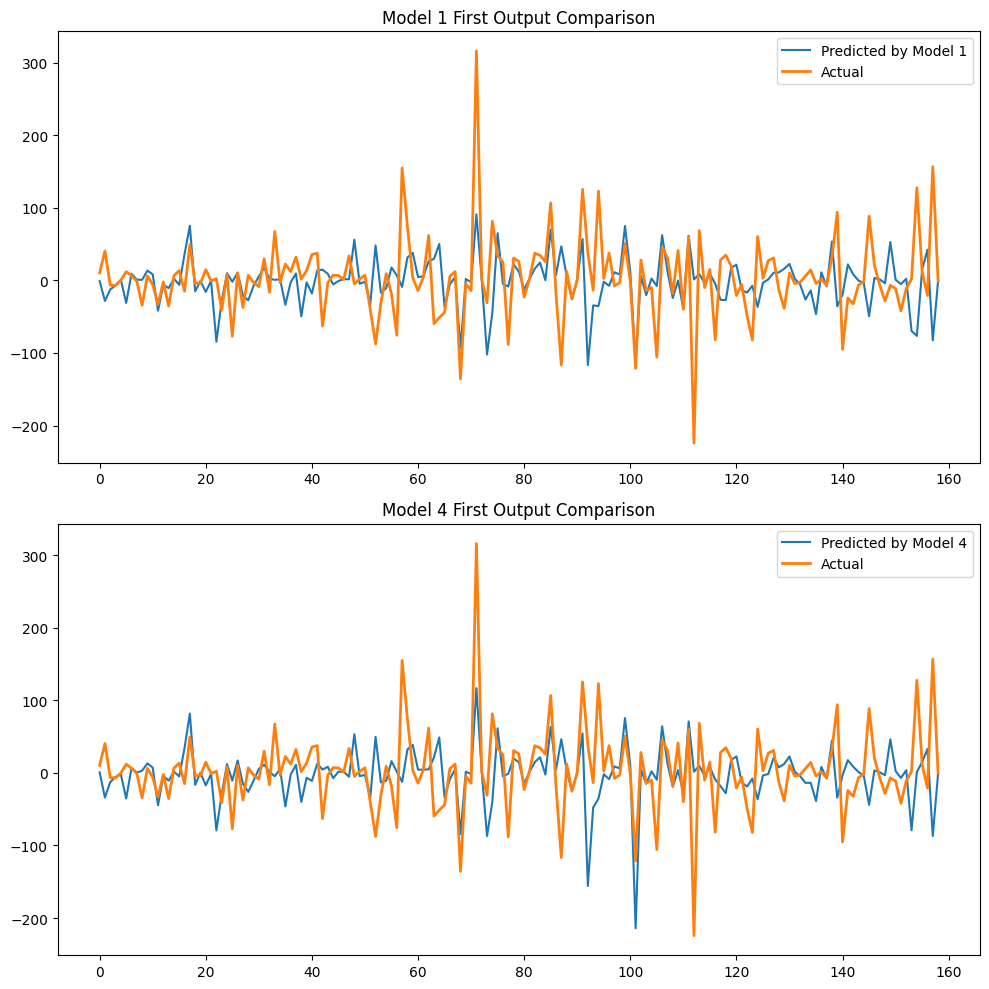

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))  # Only create two subplots
models_to_plot = [0, 3]  # Indices of the models to plot

for i in range(2):  # Only loop over two indices
    model_index = models_to_plot[i]
    axs[i].plot(predicted_first_outputs[model_index], label=f'Predicted by Model {model_index + 1}')
    axs[i].plot(actual_first_outputs, label='Actual', linewidth=2)
    axs[i].set_title(f'Model {model_index + 1} First Output Comparison')
    axs[i].legend()
    
plt.tight_layout()
plt.savefig("estimate.jpeg")
plt.show()


In [17]:
# Load the model checkpoint
checkpoint = torch.load('models for report/model1.pth', map_location=torch.device('cpu'))

model_list = [LSTM1(), LSTM2(), LSTM3(), LSTM4(), LSTM5(), LSTM6()]

model = model_list[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Load model parameters
model.load_state_dict(checkpoint['model1_state_dict'])

# Load optimizer parameters (if necessary)
optimizer.load_state_dict(checkpoint['optimizer1_state_dict'])


# Print optimizer parameters
for param_group in optimizer.param_groups:
    print(param_group)


{'lr': 0.01, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None, 'params': [Parameter containing:
tensor([[ 1.9088e-01],
        [-2.9008e-01],
        [-1.1180e-01],
        [ 7.1012e-01],
        [ 4.4784e-01],
        [ 7.6637e-01],
        [-2.7424e-02],
        [-2.3244e-01],
        [-3.0037e-01],
        [ 3.0209e-01],
        [-1.4480e-01],
        [ 2.7963e-01],
        [ 2.4100e-01],
        [-2.3276e-01],
        [-6.1527e-01],
        [-7.1927e-01],
        [-3.1263e-01],
        [ 4.3119e-02],
        [-1.4410e-01],
        [ 7.5561e-01],
        [-1.4454e-01],
        [-1.0526e-01],
        [-4.1710e-02],
        [-2.9480e-01],
        [-6.2431e-01],
        [-4.3542e-01],
        [-3.2459e-01],
        [ 1.4213e-01],
        [-1.7111e-01],
        [-1.6619e-01],
        [ 1.3421e-01],
        [ 1.1438e-01],
        [-1.5708e-01],
        [-5.0342e-01],
 

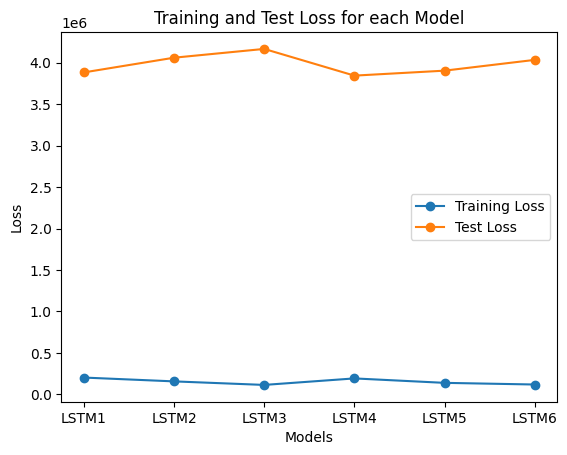

In [20]:
import matplotlib.pyplot as plt

# List of model names
models = ['LSTM1', 'LSTM2', 'LSTM3', 'LSTM4', 'LSTM5', 'LSTM6']

# Validation loss during training for each model
training_loss = [201616.7909415593, 155444.79288817875, 112751.76595082523,
                 191259.1743042649, 137705.7925829149, 117673.68080671965]

# Test loss for each model
test_loss = [3883358.8067575432, 4060873.819767862, 4166818.7299175444,
             3844619.7296163063, 3904530.274184491, 4034545.799360251]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Set the x-axis values (model names) and the y-axis values (losses)
ax.plot(models, training_loss, label='Training Loss', marker='o')
ax.plot(models, test_loss, label='Test Loss', marker='o')

# Set labels for the x-axis, y-axis, and the title
ax.set_xlabel('Models')
ax.set_ylabel('Loss')
ax.set_title('Training and Test Loss for each Model')

# Display the legend
ax.legend()

# Save the plot
plt.savefig('mselosses.jpeg')

# Show the plot
plt.show()
